In [1]:
from QuantAlgs import *

# Bernstein-Vazarani

In [2]:
#Simulate on qasm_simulator
bV_sim = berVaz.sim('101')
bV_sim

(     ┌───┐      ░            ░ ┌───┐ ░ ┌─┐      
 q_0: ┤ H ├──────░────────■───░─┤ H ├─░─┤M├──────
      ├───┤      ░        │   ░ ├───┤ ░ └╥┘┌─┐   
 q_1: ┤ H ├──────░────────┼───░─┤ H ├─░──╫─┤M├───
      ├───┤      ░        │   ░ ├───┤ ░  ║ └╥┘┌─┐
 q_2: ┤ H ├──────░───■────┼───░─┤ H ├─░──╫──╫─┤M├
      ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║ └╥┘
 q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────░──╫──╫──╫─
      └───┘└───┘ ░ └───┘└───┘ ░       ░  ║  ║  ║ 
 c: 3/═══════════════════════════════════╩══╩══╩═
                                         0  1  2 ,
 {'101': 1})

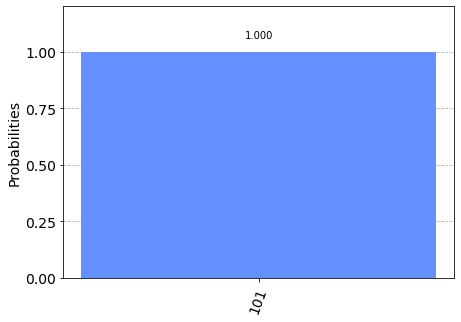

In [3]:
plot_histogram(bV_sim[1])

In [4]:
#Run on a real quantum device with circuit drawn on matplotlib
#bV_run = berVaz.run('101', device='ibmq_16_melbourne', plotTool='mpl', shots=1000)
#bV_run

In [5]:
#bV_run[0]

In [6]:
#plot_histogram(bV_run[1].get_counts(bV_run[2]))

# Deutsch–Jozsa

In [7]:
#Simulate
dJ_sim = deuJoz.sim(3,'b')
dJ_sim

(     ┌───┐     ┌────────────┐┌───┐┌─┐      
 q_0: ┤ H ├─────┤0           ├┤ H ├┤M├──────
      ├───┤     │            │├───┤└╥┘┌─┐   
 q_1: ┤ H ├─────┤1           ├┤ H ├─╫─┤M├───
      ├───┤     │  circuit83 │├───┤ ║ └╥┘┌─┐
 q_2: ┤ H ├─────┤2           ├┤ H ├─╫──╫─┤M├
      ├───┤┌───┐│            │└───┘ ║  ║ └╥┘
 q_3: ┤ X ├┤ H ├┤3           ├──────╫──╫──╫─
      └───┘└───┘└────────────┘      ║  ║  ║ 
 c: 3/══════════════════════════════╩══╩══╩═
                                    0  1  2 ,
 {'111': 1})

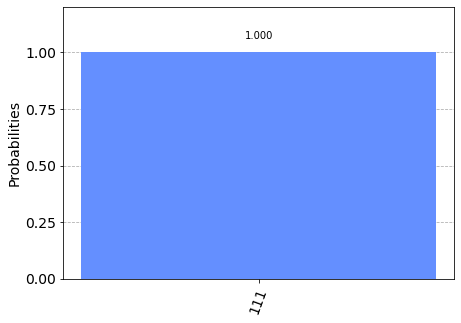

In [8]:
plot_histogram(dJ_sim[1])

In [9]:
#Run on a real quantum device with circuit drawn on matplotlib
#dJ_run = deuJoz.run(3, funcType='c', device='ibmq_16_melbourne', plotTool='mpl', shots=1000)
#dJ_run

In [10]:
#dJ_run[0]

In [11]:
#plot_histogram(dJ_run[1].get_counts(dJ_run[2]))

# Grover Search

### Building Enviroment

In [12]:
def oracle(target):
    n = len(target)
    ctrl = QuantumRegister(n-1, 'ctrl')
    anc = QuantumRegister(n-1, 'anc')
    tgt = QuantumRegister(1, 'tgt')
    qc = QuantumCircuit(ctrl, anc, tgt)
    
    def cnz(n):

        qc.ccx(ctrl[0], ctrl[1], anc[0])
        for i in range(2, n):
            qc.ccx(ctrl[i], anc[i-2], anc[i-1])


        qc.cz(anc[n-2], tgt[0])


        for i in range(n-1, 1, -1):
            qc.ccx(ctrl[i], anc[i-2], anc[i-1])
        qc.ccx(ctrl[0], ctrl[1], anc[0]) 


    def xMaker(target):

        targList = [int(i) for i in target]
        tL1 = [targList[i] for i in range(len(targList)-1)]
        tL2 = targList[-1]
        
        
        j = 0
        for i in tL1:
            if i==0:
                qc.x(j)
            j+=1
        if tL2 == 0:
            qc.x(tgt)
    xMaker(target)
    qc.barrier()
    cnz(n - 1)
    qc.barrier()
    xMaker(target)
    return qc
    
    


oracle('01000').draw()

┌───┐ ░                                   ░ ┌───┐
ctrl_0: ┤ X ├─░───■───────────────────────────■───░─┤ X ├
        └───┘ ░   │                           │   ░ └───┘
ctrl_1: ──────░───■───────────────────────────■───░──────
        ┌───┐ ░   │                           │   ░ ┌───┐
ctrl_2: ┤ X ├─░───┼────■─────────────────■────┼───░─┤ X ├
        ├───┤ ░   │    │                 │    │   ░ ├───┤
ctrl_3: ┤ X ├─░───┼────┼────■───────■────┼────┼───░─┤ X ├
        └───┘ ░ ┌─┴─┐  │    │       │    │  ┌─┴─┐ ░ └───┘
 anc_0: ──────░─┤ X ├──■────┼───────┼────■──┤ X ├─░──────
              ░ └───┘┌─┴─┐  │       │  ┌─┴─┐└───┘ ░      
 anc_1: ──────░──────┤ X ├──■───────■──┤ X ├──────░──────
              ░      └───┘┌─┴─┐   ┌─┴─┐└───┘      ░      
 anc_2: ──────░───────────┤ X ├─■─┤ X ├───────────░──────
              ░           └───┘ │ └───┘           ░      
 anc_3: ──────░─────────────────┼─────────────────░──────
        ┌───┐ ░                 │                 ░ ┌───┐
 tgt_0: ┤ X ├─░─────────────────■─────────────────░─┤ X ├
        └───┘ ░                                   ░ └───┘

In [13]:
def amplification(target):
    n = len(target)
    ctrl = QuantumRegister(n-1, 'ctrl')
    anc = QuantumRegister(n-1, 'anc')
    tgt = QuantumRegister(1, 'tgt')
    qc = QuantumCircuit(ctrl, anc, tgt)
    
    def cnz(n):

        qc.ccx(ctrl[0], ctrl[1], anc[0])
        for i in range(2, n):
            qc.ccx(ctrl[i], anc[i-2], anc[i-1])


        qc.cz(anc[n-2], tgt[0])


        for i in range(n-1, 1, -1):
            qc.ccx(ctrl[i], anc[i-2], anc[i-1])
        qc.ccx(ctrl[0], ctrl[1], anc[0]) 
        
    
    qc.h([i for i in range(n-1)])
    qc.h(tgt)
    qc.x([i for i in range(n-1)])
    qc.x(tgt)
    qc.barrier()
    cnz(n-1)
    qc.barrier()
    qc.x([i for i in range(n-1)])
    qc.x(tgt)
    qc.h([i for i in range(n-1)])
    qc.h(tgt)
        

    
    return qc



amplification('1001').draw()


┌───┐┌───┐ ░                         ░ ┌───┐┌───┐
ctrl_0: ┤ H ├┤ X ├─░───■─────────────────■───░─┤ X ├┤ H ├
        ├───┤├───┤ ░   │                 │   ░ ├───┤├───┤
ctrl_1: ┤ H ├┤ X ├─░───■─────────────────■───░─┤ X ├┤ H ├
        ├───┤├───┤ ░   │                 │   ░ ├───┤├───┤
ctrl_2: ┤ H ├┤ X ├─░───┼────■───────■────┼───░─┤ X ├┤ H ├
        └───┘└───┘ ░ ┌─┴─┐  │       │  ┌─┴─┐ ░ └───┘└───┘
 anc_0: ───────────░─┤ X ├──■───────■──┤ X ├─░───────────
                   ░ └───┘┌─┴─┐   ┌─┴─┐└───┘ ░           
 anc_1: ───────────░──────┤ X ├─■─┤ X ├──────░───────────
                   ░      └───┘ │ └───┘      ░           
 anc_2: ───────────░────────────┼────────────░───────────
        ┌───┐┌───┐ ░            │            ░ ┌───┐┌───┐
 tgt_0: ┤ H ├┤ X ├─░────────────■────────────░─┤ X ├┤ H ├
        └───┘└───┘ ░                         ░ └───┘└───┘

In [14]:
def x(y):
    return y

In [15]:
x(5)

5

In [16]:
x(3)

3

In [17]:
def mcp(self, lam, control_qubits, target_qubit):
        from qiskit.circuit.library import MCPhaseGate
        num_ctrl_qubits = len(control_qubits)
        return self.append(MCPhaseGate(lam, num_ctrl_qubits), control_qubits[:] + [target_qubit],
                           [])


In [18]:

def hadamards(target):
    target_list = [int(x) for x in str(target)]
    n = len(target_list)
    hadCirc = QuantumCircuit(n,n)
    counter = [i for i in range(n)]
    hadCirc.h(counter)
    hadCirc.barrier()
    return hadCirc

In [19]:

    
    
def oracle(target):
    target_list = [int(x) for x in str(target)]
    n = len(target_list)
    quanti = QuantumCircuit(n,n)
    counter = [i for i in range(n)]
    filtered = [counter[i] for i in range(n) if target_list[i]==0]
    if filtered != []:
        quanti.x(filtered)
    mcp(quanti, np.pi, [i for i in range(n-1)],n-1)
    if filtered != []:
        quanti.x(filtered)
    quanti.barrier()
    return quanti
    

    


oracle('1011')

In [20]:
def amplification(target):
    target_list = [int(x) for x in str(target)]
    n = len(target_list)
    counter = [i for i in range(n)]
    quantu = QuantumCircuit(n,n)
    k = round(PI*n/4 - 0.5)
    for i in range(k):
        quantu.h(counter)
        quantu.x(counter)
        mcp(quantu, np.pi, [i for i in range(n-1)],n-1)
        quantu.x(counter)
        quantu.h(counter)
        quantu.barrier()
    
    
    return quantu

amplification('1011')
    

In [21]:
cucu = hadamards('110')+oracle('110') + amplification('110')


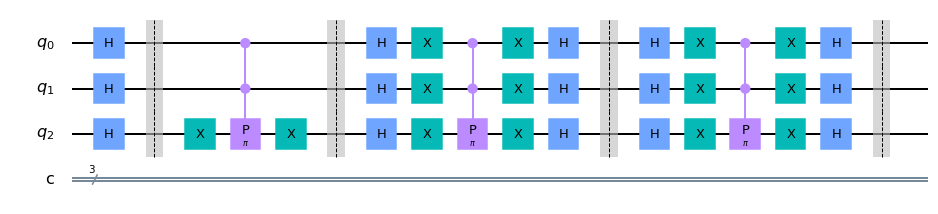

In [22]:
cucu.draw('mpl')

In [23]:
backend = Aer.get_backend('qasm_simulator')
result = execute(cucu,backend).result()
output = result.get_counts()

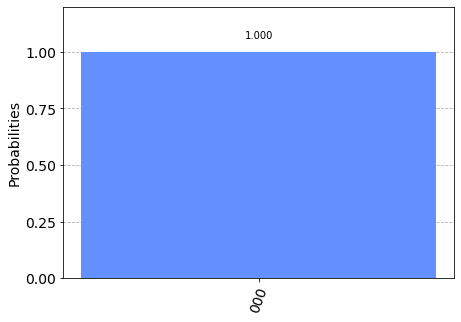

In [24]:
plot_histogram(output)

In [25]:
def groverCircuit(target):

    target_list = [int(x) for x in str(target)] #Converts the target into a list (e.g '1001' => [1,0,0,1])
    n = len(target_list) #Length of target list (i.e nbr of qubits)
    counter = [i for i in range(n)] #List containing integers from 0 to num_qubits - 1

    #Defining a CnP gate. Note that CnP(PI) = CNZ
    def mcp(self, lam, control_qubits, target_qubit):
        from qiskit.circuit.library import MCPhaseGate
        num_ctrl_qubits = len(control_qubits)
        return self.append(MCPhaseGate(lam, num_ctrl_qubits), control_qubits[:] + [target_qubit],
                       [])

    #Sub-circuit 1: Hadamard on all qubits
    def hadamards(target):
        hadCirc = QuantumCircuit(n,n)
        hadCirc.h(counter)
        hadCirc.barrier()
        return hadCirc

    #Sub-circuit 2: Oracle 
    def oracle(target):
        filtered = [counter[i] for i in range(n) if target_list[i]==0] #Filtering the counter list to only the indices where target==0
        oracleCirc = QuantumCircuit(n,n)
        if filtered != []:
            oracleCirc.x(filtered) #In other words, if target only has 1s, do nothing 
        mcp(oracleCirc, np.pi, [i for i in range(n-1)],n-1)
        if filtered != []:
            oracleCirc.x(filtered) #Applying X gates to the qubits which represent 0
        oracleCirc.barrier()
        return oracleCirc

    #Sub-circuit 3: Amplifier
    def amplification(target):
        ampCirc = QuantumCircuit(n,n)
        k = round(PI*n/4 - 0.5) #Ideal number of amp-iterations 
        for i in range(k):
            ampCirc.h(counter)
            ampCirc.x(counter)
            mcp(ampCirc, np.pi, [i for i in range(n-1)],n-1)
            ampCirc.x(counter)
            ampCirc.h(counter)
            ampCirc.barrier()


        return ampCirc

    circuit = hadamards(target) + oracle(target) + amplification(target)
    circuit.measure(counter, counter)
    return circuit
    

In [49]:
a = groverCircuit('1111')

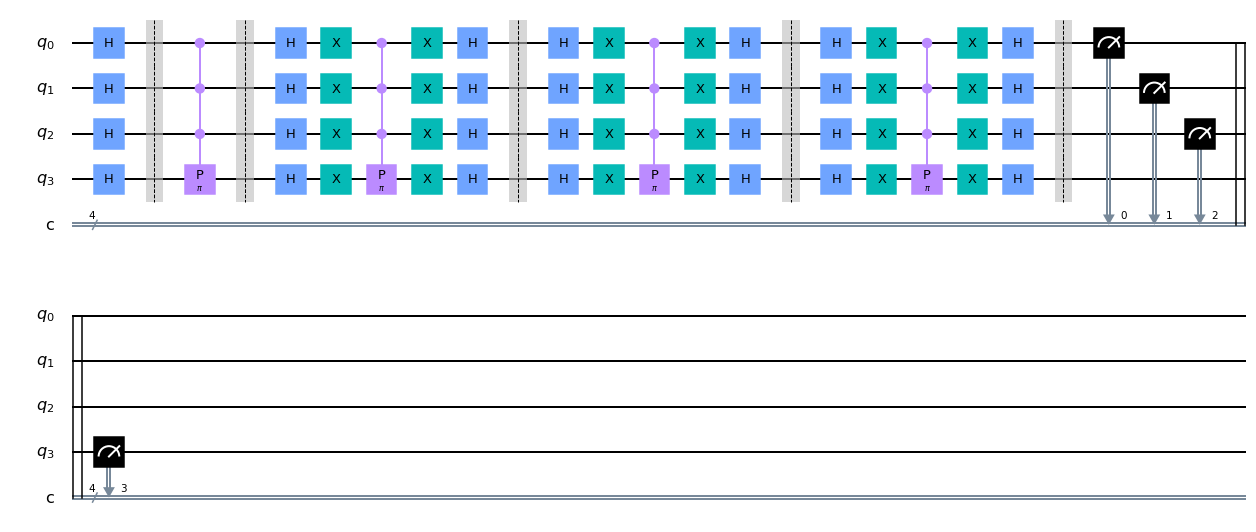

In [50]:
a.draw('mpl')

In [47]:
from QuantAlgs import grovSearch as grover

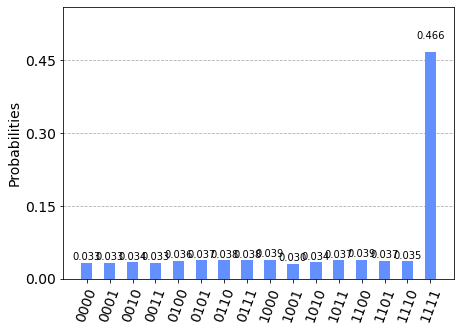

In [48]:
a = grover.sim('1111',shots=8000)
plot_histogram(a[1])

In [39]:
#a = grovSearch.run('1001',device='ibmq_santiago')

#plot_histogram(a[1])

In [31]:
def CRZ(self, lam, control_qubits, target_qubit):
            from qiskit.circuit.library import MCPhaseGate
            num_ctrl_qubits = len(control_qubits)
            return self.append(MCPhaseGate(lam, num_ctrl_qubits), control_qubits[:] + [target_qubit],
                           [])
        

In [32]:
def groverCircuit(target):
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-32-c0fc25115eae>, line 3)

In [ ]:
a = groverCircuit('1011')

In [ ]:
a.draw('mpl')

In [ ]:
plot_histogram(a[1].get_counts(a[2]))

In [67]:
def deuJozCirc(n, funcType):

    def gateMaker(n, funcType='text'):
        N = int(n)
        gate = QuantumCircuit(N+1)

        if funcType.lower() == "b":
            xNum = format(np.random.randint(1,2**N), '0'+str(n)+'b')
            for i in range(len(xNum)):
                if xNum[i] == '1':
                    gate.x(i)
            for i in range(N):
                gate.cx(i, N)
            for i in range(len(xNum)):
                if xNum[i] == '1':
                    gate.x(i)

        if funcType.lower() == "c":

            output = np.random.randint(2)
            if output == 1:
                gate.x(N)

        Gate = gate.to_gate()
        Gate.name = "Black Box" 
        return gate

    N = int(n)
    blackBox = gateMaker(n, funcType)
    circuit = QuantumCircuit(n+1, n)
    circuit.x(N)
    circuit.h(N)
    for i in range(N):
        circuit.h(i)
    circuit.append(blackBox, range(n+1))
    for i in range(N):
        circuit.h(i)

    for i in range(N):
        circuit.measure(i, i)

    backend = Aer.get_backend('qasm_simulator')
    result = execute(circuit,backend, shots = 1).result()
    output = result.get_counts()
    return circuit

goog(10, 'b').draw()

┌───┐     ┌──────────────┐┌───┐┌─┐                           
 q_0: ┤ H ├─────┤0             ├┤ H ├┤M├───────────────────────────
      ├───┤     │              │├───┤└╥┘┌─┐                        
 q_1: ┤ H ├─────┤1             ├┤ H ├─╫─┤M├────────────────────────
      ├───┤     │              │├───┤ ║ └╥┘┌─┐                     
 q_2: ┤ H ├─────┤2             ├┤ H ├─╫──╫─┤M├─────────────────────
      ├───┤     │              │├───┤ ║  ║ └╥┘┌─┐                  
 q_3: ┤ H ├─────┤3             ├┤ H ├─╫──╫──╫─┤M├──────────────────
      ├───┤     │              │├───┤ ║  ║  ║ └╥┘┌─┐               
 q_4: ┤ H ├─────┤4             ├┤ H ├─╫──╫──╫──╫─┤M├───────────────
      ├───┤     │              │├───┤ ║  ║  ║  ║ └╥┘┌─┐            
 q_5: ┤ H ├─────┤5  circuit534 ├┤ H ├─╫──╫──╫──╫──╫─┤M├────────────
      ├───┤     │              │├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐         
 q_6: ┤ H ├─────┤6             ├┤ H ├─╫──╫──╫──╫──╫──╫─┤M├─────────
      ├───┤     │              │├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
 q_7: ┤ H ├─────┤7             ├┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├──────
      ├───┤     │              │├───┤ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_8: ┤ H ├─────┤8             ├┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤     │              │├───┤ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_9: ┤ H ├─────┤9             ├┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
      ├───┤┌───┐│              │└───┘ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
q_10: ┤ X ├┤ H ├┤10            ├──────╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─
      └───┘└───┘└──────────────┘      ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
c: 10/════════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                                      0  1  2  3  4  5  6  7  8  9

In [160]:
def groverCircuit(target):

    target_list = [int(x) for x in str(target)] #Converts the target into a list (e.g '1001' => [1,0,0,1])
    n = len(target_list) #Length of target list (i.e nbr of qubits)
    counter = [i for i in range(n)] #List containing integers from 0 to num_qubits - 1

    #Defining a CnP gate. Note that CnP(PI) = CNZ
    def mcp(self, lam, control_qubits, target_qubit):
        from qiskit.circuit.library import MCPhaseGate
        num_ctrl_qubits = len(control_qubits)
        return self.append(MCPhaseGate(lam, num_ctrl_qubits), control_qubits[:] + [target_qubit],
                       [])

    #Sub-circuit 1: Hadamard on all qubits
    def hadamards(target):
        hadCirc = QuantumCircuit(n,n)
        hadCirc.h(counter)
        hadCirc.barrier()
        return hadCirc

    #Sub-circuit 2: Oracle 
    def oracle(target):
        filtered = [counter[i] for i in range(n) if target_list[i]==0] #Filtering the counter list to only the indices where target==0
        oracleCirc = QuantumCircuit(n,n)
        if filtered != []:
            oracleCirc.x(filtered) #In other words, if target only has 1s, do nothing 
        mcp(oracleCirc, np.pi, [i for i in range(n-1)],n-1)
        if filtered != []:
            oracleCirc.x(filtered) #Applying X gates to the qubits which represent 0
        oracleCirc.barrier()
        return oracleCirc

    #Sub-circuit 3: Amplifier
    def amplification(target):
        ampCirc = QuantumCircuit(n,n)
        ampCirc.h(counter)
        ampCirc.x(counter)
        mcp(ampCirc, np.pi, [i for i in range(n-1)],n-1)
        ampCirc.x(counter)
        ampCirc.h(counter)
        ampCirc.barrier()
        return ampCirc
    
    k = round(PI*n/4 - 0.5) #Ideal number of iterations. k = π/4 * √N - 1/2. 
    
    circuit = hadamards(target) 
    
    for i in range(k): #Iterating the oracle and amplification 
        circuit+=oracle(target)
        circuit+= amplification(target)
    
    circuit.measure(counter, counter)
    return circuit
    

In [161]:
circuit = groverCircuit('1010')
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend, shots = 4000).result()
output = result.get_counts()

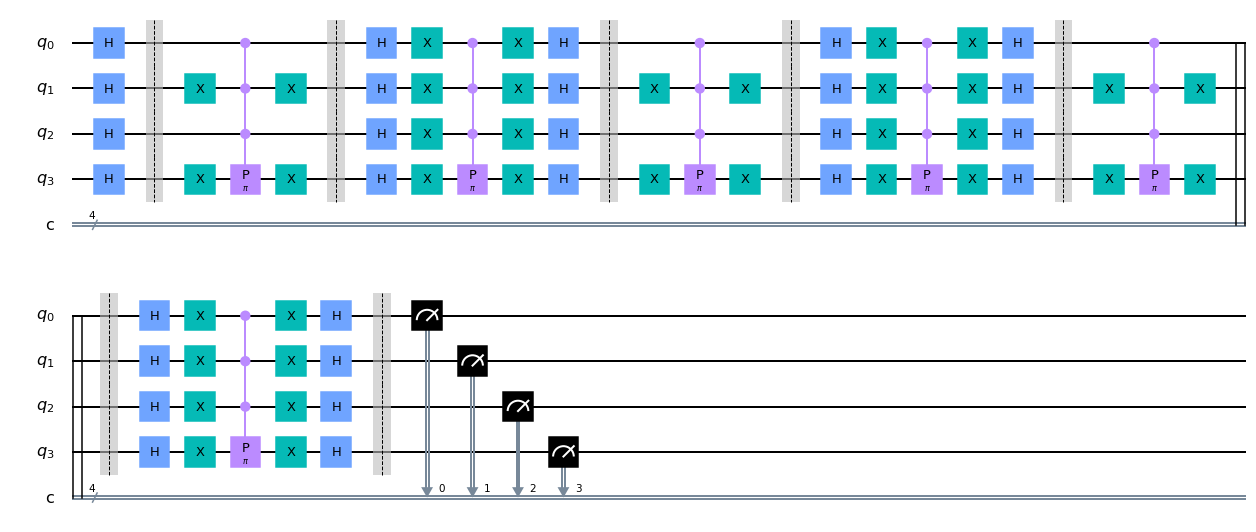

In [162]:
circuit.draw('mpl')

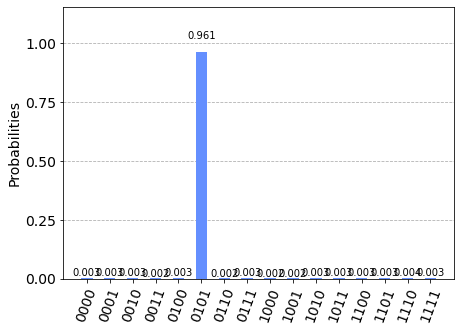

In [163]:
plot_histogram(output)

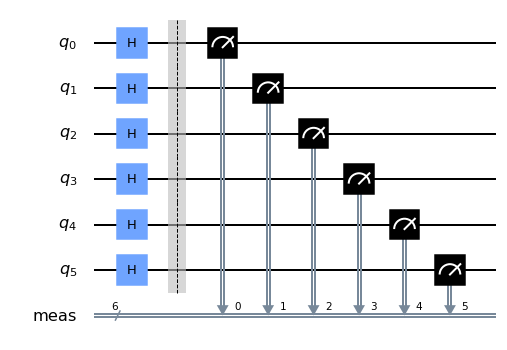

In [182]:
n = 6
target = [i for i in range(n)]
movieWatch = QuantumCircuit(n)
movieWatch.h(target)
movieWatch.measure_all()
movieWatch.draw('mpl')

In [183]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(movieWatch, backend=qcomp, shots=1)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-06-01 21:12:48,622: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


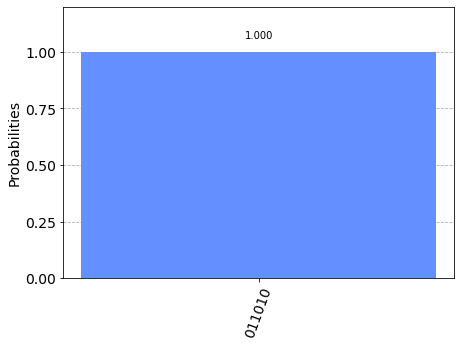

In [185]:
plot_histogram(result.get_counts(movieWatch))